# Sampling via Inversion

A simple example of sampling via inversion will be given below.

In the lecture we have derived the sampler for exponential distribution:
\begin{align*}
p(x) = \text{Exp}(x;\lambda) = \lambda e^{-\lambda x}.
\end{align*}
We calculate the CDF
\begin{align*}
F_X(x) =& \int_{0}^x p(x') \mathrm{d} x', \\
=& \lambda \int_0^x e^{-\lambda x'} \mathrm{d} x', \\
=& {\lambda} \left[ -\frac{1}{\lambda} e^{- \lambda x'}\right]_{x' = 0}^x \\
=& 1 - e^{-\lambda x}.
\end{align*}
Deriving the inverse:
\begin{align*}
u =& 1 - e^{-\lambda x}\\
\implies x =& -\frac{1}{\lambda} \log (1 - u)\\
\implies F_X^{-1}(u) =& -\lambda^{-1} \log (1 - u).
\end{align*}
which gives us the sampler:
* Generate $u_i \sim \text{Unif}([0, 1])$
* $x_i = -\lambda^{-1} \log (1 - u_i)$.

Let us look at the code for this sampler.


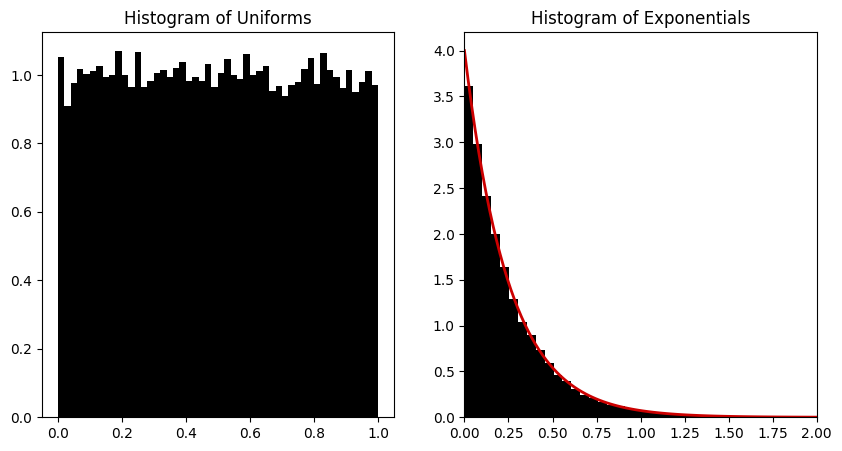

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

# an illustration of inverse transform sampling for the exponential distribution
# with parameter lambda = 4
lam = 4
N = 50000

x = np.array([])
un = []
for n in range(N):
    u = rng.uniform(0, 1)
    un.append(u)
    x = np.append(x, -np.log(1 - u) / lam)

fig = plt.figure(figsize=(10, 5))
axs = fig.subplots(1, 2)

# plot u on the y axis
xx = np.linspace(0, 2, 100)
axs[0].hist(un, bins=50, density=True, color='k') # histogram of uniforms
axs[0].set_title("Histogram of Uniforms")
axs[1].hist(x, bins=50, density=True, color='k') # histogram of exponentials
axs[1].plot(xx, exponential_pdf(xx, lam), color=[0.8, 0, 0], linewidth=2) # plot the pdf
axs[1].set_xlim(0, 2)
axs[1].set_title("Histogram of Exponentials")
plt.show()